# Selecionando parâmetros para o KNN

Neste notebook selecionaremos o melhor valor de K para o algoritmo de seleção KNN

### Importar as bibliotecas

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

### Carregar os dados 

In [3]:
# Dados de treinameto
training_mean = pd.read_csv("data/training_mean.csv").set_index('sessionNo') # Missing values substituídos pela média
training_mode = pd.read_csv("data/training_mode.csv").set_index('sessionNo') # Missing values substituídos pela moda
training_median = pd.read_csv("data/training_median.csv").set_index('sessionNo') # Missing values substitídos pela mediana

# Dados de teste
testing_mean = pd.read_csv("data/testing_mean.csv").set_index('sessionNo') # Missing values substituídos pela média
testing_mode = pd.read_csv("data/testing_mode.csv").set_index('sessionNo') # Missing values substituídos pela moda
testing_median = pd.read_csv("data/testing_median.csv").set_index('sessionNo') # Missing values substitídos pela mediana

## Escolher o melhor parâmetro K para o KNN e a melhot estratégia para tratamento de missing values

### Separar os dados de treinamento e teste em um vetor de características e  um vetor de classes

In [69]:
def splitData(df):
    x = df.iloc[:, :-1]
    y = df['order']
    return x, y

### Realizar a classificação

Variando o valor de k entre 1 e 201 passo 2

In [68]:
def makeErrosKnn(df_train, df_test, length):
    x_train, y_train = splitData(df_train)
    x_test, y_test = splitData(df_test)
    ks = list(range(1, length, 2))
    erros = []
    
    for k in ks:
        knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
        knn.fit(x_train, y_train)
        erros.append(abs(y_test - knn.predict(x_test)).sum())
    return erros

### Melhor K para a estratégia de substituir missing values pela média

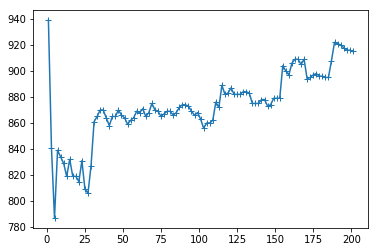

787.0


In [70]:
erros = makeErrosKnn(training_mean, testing_mean, 203)
plt.plot(list(range(1, 203, 2)), erros, marker='+')
plt.show()
print(min(erros))

### Melhor K para a estratégia de substituir missing values pela moda

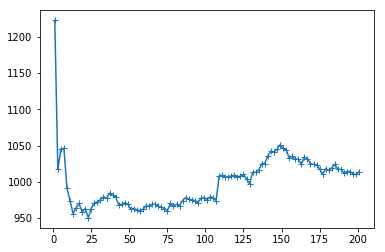

950.0


In [72]:
erros = makeErrosKnn(training_mode, testing_mode, 203)
plt.plot(list(range(1, 203, 2)), erros, marker='+')
plt.show()
print(min(erros))

### Melhor K para a estratégia de substituir missing values pela mediana

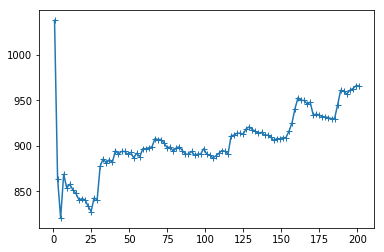

821.0


In [71]:
erros = makeErrosKnn(training_median, testing_median, 203)
plt.plot(list(range(1, 203, 2)), erros, marker='+')
plt.show()
print(min(erros))

## Escolher a melhor quantidade de estimadores para o RF e a melhor estratégia para tratamento de missing values

In [78]:
def errorRandomForest(df_train, df_test, length):
    x_train, y_train = splitData(df_train)
    x_test, y_test = splitData(df_test)
    estimators = list(range(1, length, 2))
    erros = []
    for e in estimators:
        rf = RandomForestClassifier(n_estimators=e, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)
        rf.fit(x_train, y_train)
        erros.append(abs(y_test - rf.predict(x_test)).sum())
    return erros

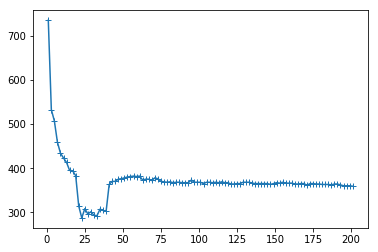

287.0


In [48]:
errors = errorRandomForest(training_mean, testing_mean, 203)
plt.plot(list(range(1, 203, 2)), errors, marker='+')
plt.show()
print(min(errors))

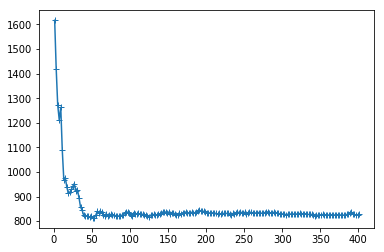

813.0


In [81]:
errors = errorRandomForest(training_mode, testing_mode, 403)
plt.plot(list(range(1, 403, 2)), errors, marker='+')
plt.show()
print(min(errors))

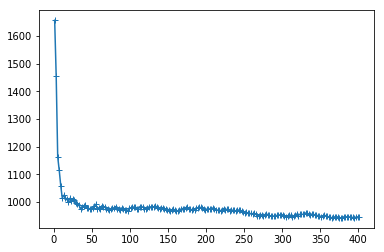

943.0


In [82]:
errors = errorRandomForest(training_median, testing_median, 403)
plt.plot(list(range(1, 403, 2)), errors, marker='+')
plt.show()
print(min(errors))

## Fazendo o que tem que fazer da arvore

In [30]:
tree = DecisionTreeClassifier(criterion='entropy',max_depth=None, min_samples_split=2,random_state=0)

### Realiza classificação com a arvore de decisão

In [73]:
def errorDecisionTree(df_train, df_test):
    x_train, y_train = splitData(df_train)
    x_test, y_test = splitData(df_test)
    tree.fit(x_train,y_train)
    error = abs(y_test - tree.predict(x_test)).sum()
    return error

### Erro calulado com a estratégia de substituir missing values pela média

In [74]:
errorDecisionTree(training_mean, testing_mean)

736.0

### Erro calulado com a estratégia de substituir missing values pela moda

In [75]:
errorDecisionTree(training_mode, testing_mode)

1254.0

### Erro calulado com a estratégia de substituir missing values pela mediana

In [76]:
errorDecisionTree(training_median, testing_median)

1391.0

In [ ]:
x_train, y_train = splitData(training_mode)
x_test, y_test = splitData(testing_mode)
estimators = list(range(1, 5000, 50))
errors = []
for e in estimators:
    rf = RandomForestClassifier(n_estimators=e, max_depth=None, min_samples_split=2, random_state=0, n_jobs=-1)
    rf.fit(x_train, y_train)
    erros.append(abs(y_test - rf.predict(x_test)).sum())

plt.plot(estimators, errors, marker='+')
plt.show()
print(min(errors))